In [4]:
import numpy as np
import pandas as pd

      
df = pd.read_csv('movie_review.csv')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [5]:
len(df)

64720

In [96]:
print(df['text'][20]) # Посмотрим, как выглядит любой отзыв

even the acting in from hell is solid , with the dreamy depp turning in a typically strong performance and deftly handling a british accent .


In [7]:
# Посмотрим, какие у нас есть отзывы:
df['tag'].unique()

array(['pos', 'neg'], dtype=object)

У нас действительно есть только позитивные или негативные отзывы, нейтральных нет

In [8]:
# Теперь посмотрим, сколько позитивных и негативных рецензий:

df['tag'].value_counts()

pos    32937
neg    31783
Name: tag, dtype: int64

In [9]:
# Убираем лишние колонки

df = df.drop(['fold_id','cv_tag','html_id', 'sent_id'], axis=1)

display(df)

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [10]:
# Для удобства переименовывем колонки

df = df.rename(columns={"tag": "review"})
display(df)

,text,review
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


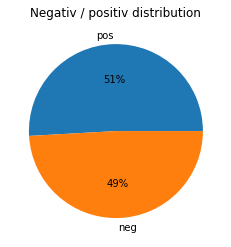

In [11]:
# Визуализируем распределение позитивных и негативных

import matplotlib.pyplot as plt

classes = pd.value_counts(df["review"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 

plt.title("Negativ / positiv distribution")

plt.ylabel('')

plt.show()

In [12]:
# Для более точной тренировки модели заменим позитивные и негативные отзывы на 0 и 1

df["review"]=df["review"].map({'pos':1,'neg':0}) 
df      

,text,review
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,"after watching one of the "" roxbury "" skits on...",0
64718,"bump unsuspecting women , and . . . that's all .",0


In [13]:
# Проверм, нет ли в нашем датасете нулевых значений

df.isnull().sum() 

text      0
review    0
dtype: int64

In [14]:
# Нулевых значений не оказалось, но на всякий случай вставим строчку для удаления

df.dropna(inplace=True)

In [15]:
len(df)

64720

In [16]:
# Теперь удаляем пропуски, если они имеются.  

blanks = list()  

for i,tx,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():        
            blanks.append(i)        


In [17]:
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


# Пробелов не казалось, тогда идем дальше.

# Теперь переходим непосредственно к тренировке модели.

# Делим наш датафрейм на тренировочные и тестовые данные

In [31]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['review']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Через Pipeline запускаем векторизацию и используем метод Naive Bayes

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

In [33]:
text_clf_nb.fit(X_train, y_train) # Тренируем модель

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Сделаем прогнозы, проанализируем и сравним результаты

In [34]:
predictions = text_clf_nb.predict(X_test) 

In [35]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7084 3424]
 [2831 8019]]


7084 негативных и 8019 позитивных были правильно спрогнозированы, а 2831 и 3424 неправильно 

In [36]:
# сделаем сводку отчетов
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     10508
           1       0.70      0.74      0.72     10850

    accuracy                           0.71     21358
   macro avg       0.71      0.71      0.71     21358
weighted avg       0.71      0.71      0.71     21358



precision и recall neg и pos примерно 71%, то есть мы уже более-менее можем предсказать, является ли отзыв отрицательным или положительным, но результат все-таки оставляет желать лучшего.

In [37]:
# Теперь рассмотрим accuracy 
print(metrics.accuracy_score(y_test,predictions))

0.7071354995786122


accuracy_score нам также выдает 70%

# Тогда попробуем метод опорных векторов:

In [39]:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [40]:
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[7241 3267]
 [3230 7620]]


In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10508
           1       0.70      0.70      0.70     10850

    accuracy                           0.70     21358
   macro avg       0.70      0.70      0.70     21358
weighted avg       0.70      0.70      0.70     21358



In [42]:
print(metrics.accuracy_score(y_test,predictions))

0.6958048506414458


# Метод опорных векторов не дал нам лучшего результата, даже немного хуже. Попробуем удалить стоп-слова:

In [44]:
text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words="english")),
                     ('clf', LinearSVC()),
])
text_clf_lsvc2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [45]:
predictions = text_clf_lsvc2.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[7187 3321]
 [3368 7482]]


In [46]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     10508
           1       0.69      0.69      0.69     10850

    accuracy                           0.69     21358
   macro avg       0.69      0.69      0.69     21358
weighted avg       0.69      0.69      0.69     21358



In [47]:
print(metrics.accuracy_score(y_test,predictions))

0.6868152448731155


# После удаления стоп-слов результат лучше не стал

In [ ]:
# Переходим к практической части. Попробуем "скормить" модели новую рецензию и посмотреть каков будет ответ:

In [65]:
myreview = "This movie was really terrible. I'm sure the producers had the best intentions, but the execution was lacking."

In [66]:
print(text_clf_nb.predict([myreview]))

[0]


In [83]:
myreview1 = "It is the film that you want to watch over and over again. Definitely, the new film by Cameron couldn’t be missed."

In [84]:
print(text_clf_nb.predict([myreview1]))

[1]


# Обе рецензии были правильно определены.

# Для сравнения применим модуль VADER из библиотеки NLTK 

In [54]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sveta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
rev = "This movie was really terrible. I'm sure the producers had the best intentions, but the execution was lacking."

In [64]:
sid.polarity_scores(rev)

{'neg': 0.102, 'neu': 0.695, 'pos': 0.203, 'compound': 0.2927}

In [81]:
rev1 = "It is the film that you want to watch over and over again. Definitely, this is a new film by Cameron couldn’t be missed."

In [82]:
sid.polarity_scores(rev1)

{'neg': 0.084, 'neu': 0.763, 'pos': 0.153, 'compound': 0.2023}

# Здесь можно заметить, что Vader определил обе эти рецензии скорее как отрицательные, то есть он не может с большей точностью определять эмоциональную окраску. Это демонстрирует одну из актуальных проблем в анализе настроений - понимание человеческой семантики. 

# Сделаем сравнительный анализ между оригинальным тегом и comp_score:

In [177]:
# Добавим метки и рейтинги в DataFrame
# Дальше дополняем исходный DataFrame словарями polarity_score, извлеченными общими рейтингами и новыми метками 
# "положительный / отрицательный", полученными на основе общего рейтинга. 
# Мы будем использовать этот последний столбец для проверки точности.

In [71]:
df = pd.read_csv('movie_review.csv')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [72]:
df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag,scores,compound,comp_score
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos,"{'neg': 0.165, 'neu': 0.719, 'pos': 0.115, 'co...",-0.5346,neg
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.2500,pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos,"{'neg': 0.073, 'neu': 0.836, 'pos': 0.091, 'co...",0.1263,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.1655,pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [85]:
accuracy_score(df['tag'],df['comp_score'])

0.5423053152039555

In [86]:
print(classification_report(df['tag'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.55      0.37      0.44     31783
         pos       0.54      0.71      0.61     32937

    accuracy                           0.54     64720
   macro avg       0.54      0.54      0.53     64720
weighted avg       0.54      0.54      0.53     64720



In [76]:
print(confusion_matrix(df['tag'],df['comp_score']))

[[11650 20133]
 [ 9489 23448]]


In [78]:
df['positive'] = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['negative'] = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['compound']  =df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head(10)

,fold_id,cv_tag,html_id,sent_id,text,tag,scores,compound,comp_score,positive,negative,neutral
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos,"{'neg': 0.165, 'neu': 0.719, 'pos': 0.115, 'co...",-0.5346,neg,0.115,0.165,0.719
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.2500,pos,0.067,0.000,0.933
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos,"{'neg': 0.073, 'neu': 0.836, 'pos': 0.091, 'co...",0.1263,pos,0.091,0.073,0.836
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.1655,pos,0.067,0.000,0.933
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
5,0,cv000,29590,5,if you can get past the whole comic book thing...,pos,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.4404,neg,0.000,0.112,0.888
6,0,cv000,29590,6,getting the hughes brothers to direct this see...,pos,"{'neg': 0.321, 'neu': 0.576, 'pos': 0.103, 'co...",-0.9542,neg,0.103,0.321,0.576
7,0,cv000,29590,7,"the ghetto in question is , of course , whitec...",pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000
8,0,cv000,29590,8,"it's a filthy , sooty place where the whores (...",pos,"{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp...",-0.8275,neg,0.000,0.251,0.749
9,0,cv000,29590,9,"when the first stiff turns up , copper peter g...",pos,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,0.000,1.000


# В результате мы видим, что из 10 рецензий в comp_score определились правильно только 6. Во многих рецензиях окончательное суждение было вынесено только в конце предложений, что, видимо, затрудняло правильное определение. 